## Collaboration EDA

Exploratory data analysis focused on collaboration of authors on papers.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np

%matplotlib inline

In [2]:
%%time

# load metadata extracted data in notebook 00_load_metadata
# parse the author_parsed entries into a list of authors for each paper
arxiv_metadata = pd.read_csv('data/arxiv_metadata.zip', converters={"authors_parsed": lambda x:[entry.strip('[]') for entry in  x.split("], ")]})

<timed exec>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 11.3 s, sys: 1.34 s, total: 12.6 s
Wall time: 13.4 s


### Distribution of number of authors by paper

In [3]:
def count_authors_by_paper(df):
    return df['authors_parsed'].apply(lambda x: len(x))

In [4]:
author_counts = count_authors_by_paper(arxiv_metadata)
author_counts.describe()

count    2.412624e+06
mean     4.460248e+00
std      2.220261e+01
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      2.832000e+03
Name: authors_parsed, dtype: float64

In [5]:
author_counts.median()

3.0

### Distribution of number of authors by paper and subject
* add a column with author counts to each paper
* For every subject, make an array of author counts, note that a paper may have multiple subjects.
* Sort by median of author counts
* Plot as boxplots

In [6]:
arxiv_metadata['authors_count'] = author_counts

In [7]:
keys = ["Computer Science", "Economics", "Electrical Engineering and Systems Science", "Mathematics", "Physics", "Quantitative Biology", "Quantitative Finance", "Statistics", "Junk"]

In [8]:
author_counts_by_subject = {key: [] for key in keys}
for key in keys:
    idx = arxiv_metadata[key] == 1
    papers_by_subject = arxiv_metadata[idx]
    author_counts_by_subject[key] = papers_by_subject['authors_count']


In [9]:
# convert the dict to a dataframe (so that it can be sorted)
df = pd.DataFrame(author_counts_by_subject, columns=author_counts_by_subject.keys())

In [10]:
# sort dataframe by median
med = df.median()
med = med.sort_values(ascending=True)
newdf = df[med.index]

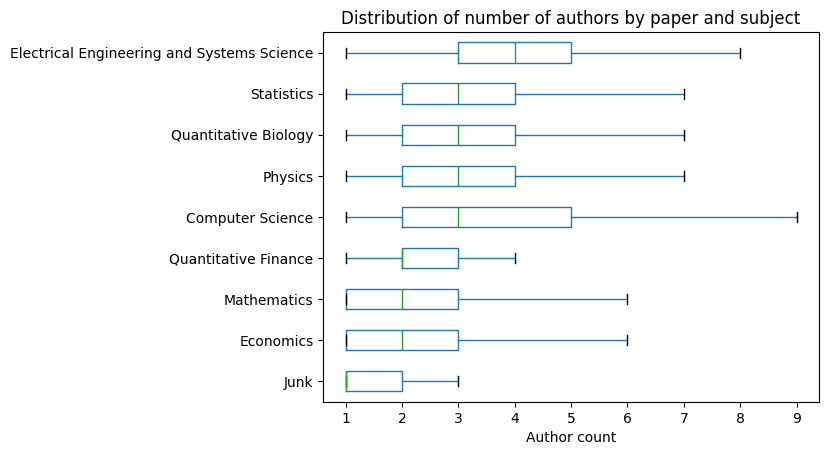

In [11]:
box_plot = newdf.boxplot(showfliers=False, vert=False)
box_plot.set_title('Distribution of number of authors by paper and subject')
box_plot.set_xlabel('Author count')
box_plot.grid(False)
plt.show()

### Distribution of number of authors per paper, by paper creation date


* (add a column with author counts to each paper)
* group papers by year and month,
* for every group, make an array of author counts, i.e. array of number of authors per paper
* Plot 


In [15]:
# keep only papers 1992 - 2023, as older years are incomplete
min_year = 1992  # arxiv_metadata.year.min()
max_year = 2023  # arxiv_metadata.year.max()

In [12]:
def group_papers_by_year_month(df):
    # Group papers by year and month
    df = df[(df['year'] >= min_year)]
    df = df[(df['year'] <= max_year)]
    return df.groupby([df.year, df.month])

In [38]:
def authors_counts_by_year_month(df):
    papers_all_by_year_month = group_papers_by_year_month(df)
    # For each year-month group, make an array of author counts, i.e. array of number of authors per paper
    authors_counts = pd.DataFrame(columns=['year', 'month', 'count'])
    year = []; month = []; authors_count = []
    for entry in papers_all_by_year_month:
        entry_year = entry[0][0]
        year.append(entry_year)
        entry_month = entry[0][1]
        month.append(entry_month)
        entry_count = entry[1]['authors_count']
        authors_count.append(entry_count)
    authors_counts['year'] = year
    authors_counts['month'] = month
    authors_counts['count'] = authors_count
    return authors_counts

In [47]:
authors_counts = authors_counts_by_year_month(arxiv_metadata)

In [57]:
authors_counts['median'] = authors_counts['count'].apply(lambda x: x.median())

/tmp/ipykernel_4628/3581123882.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


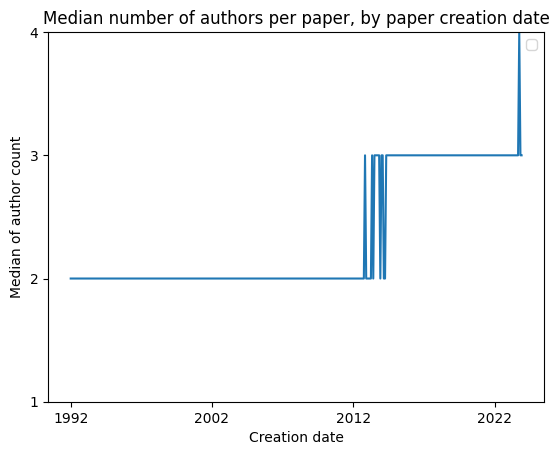

In [66]:
plt.title('Median number of authors per paper, by paper creation date')
plt.xticks(ticks=range(0, len(authors_counts), 120), labels=range(min_year, max_year+1, 10))
plt.yticks(ticks=range(1, round(authors_counts['median'].max())+1))
plt.ylim(1, round(authors_counts['median'].max()))
plt.xlabel('Creation date')
plt.ylabel('Median of author count')
plt.plot(authors_counts['median'])
plt.legend()
plt.show();